## CNN for music genre classification

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.initializers import HeNormal
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint

In [81]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))

Num GPUs Available: 1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Folder setup

In [82]:
SPEC_TRAIN_FOLDER = "Data/Spectograms/train"
AUG_SPEC_TRAIN_FOLDER = "Data/AugmentedSpectrograms/train"
SPEC_TEST_FOLDER = "Data/test"
SPEC_VAL_FOLDER = "Data/val"

## Constants

In [83]:
IMAGE_SIZE = (130, 128)

In [84]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=SPEC_TRAIN_FOLDER,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SIZE,
    batch_size=32,
)

aug_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=AUG_SPEC_TRAIN_FOLDER,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SIZE,
    batch_size=32,
)

Found 5995 files belonging to 10 classes.
Found 17401 files belonging to 10 classes.


In [85]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=SPEC_TEST_FOLDER,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SIZE,
    batch_size=32,
    color_mode='rgb'
)

Found 1998 files belonging to 10 classes.


In [86]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=SPEC_VAL_FOLDER,
    labels='inferred',
    label_mode='int',
    image_size=IMAGE_SIZE,
    batch_size=32,
    color_mode='rgb'
)

Found 1998 files belonging to 10 classes.


In [87]:
def get_model(input_shape):
    input_shape = (input_shape[0], input_shape[1], 3)
    model = Sequential([
        Conv2D(32, kernel_size=3, padding='same', activation='relu', kernel_initializer=HeNormal(), input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(64, kernel_size=3, padding='same', activation='relu', kernel_initializer=HeNormal()),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(128, kernel_size=3, padding='same', activation='relu', kernel_initializer=HeNormal()),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        Dropout(0.3),

        Flatten(),
        Dense(128, activation='relu', kernel_initializer=HeNormal()),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model


In [88]:
check_point = ModelCheckpoint(
    filepath='best_model_aug.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [ ]:
def compile_model(model):
   model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [90]:
def train_model(model, train_ds, epochs):
    model.fit(train_ds, epochs=epochs, callbacks=[check_point], validation_data=val_ds)

In [91]:
simple_model = get_model(IMAGE_SIZE)
simple_model.summary()

aug_model = get_model(IMAGE_SIZE)

/home/diego/GenreGenie/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 130, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 65, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 65, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 65, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289,866 (16.36 MB)

 Trainable params: 4,289,418 (16.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [92]:
compile_model(simple_model)
compile_model(aug_model)

In [ ]:
# train_model(model, train_ds, 30)

In [94]:
aug_model.load_weights('best_model_aug.keras')
simple_model.load_weights('best_model.weights.h5')

/home/diego/GenreGenie/venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
test_loss, test_acc = simple_model.evaluate(test_ds)
val_loss, val_acc = simple_model.evaluate(val_ds)
print('\nSimple model:')
print('\nTest accuracy:', test_acc)
print('Test lost:', test_loss)
print('\nValidation accuracy:', val_acc)
print('Validation lost:', val_loss)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7440 - loss: 0.9041
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7245 - loss: 1.0673

Simple model

Test accuracy: 0.7452452182769775
Test lost: 0.9717114567756653

Validation accuracy: 0.7247247099876404
Validation lost: 1.0670900344848633


In [100]:
test_loss, test_acc = aug_model.evaluate(test_ds)
val_loss, val_acc = aug_model.evaluate(val_ds)
print('\n Augmented model:')
print('\nTest accuracy:', test_acc)
print('Test lost:', test_loss)
print('\nValidation accuracy:', val_acc)
print('Validation lost:', val_loss)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9233 - loss: 0.7685
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8912 - loss: 1.1944

 Augmented model:

Test accuracy: 0.924424409866333
Test lost: 0.8120791912078857

Validation accuracy: 0.8968968987464905
Validation lost: 1.1942414045333862


2025-05-25 14:58:27.532203: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


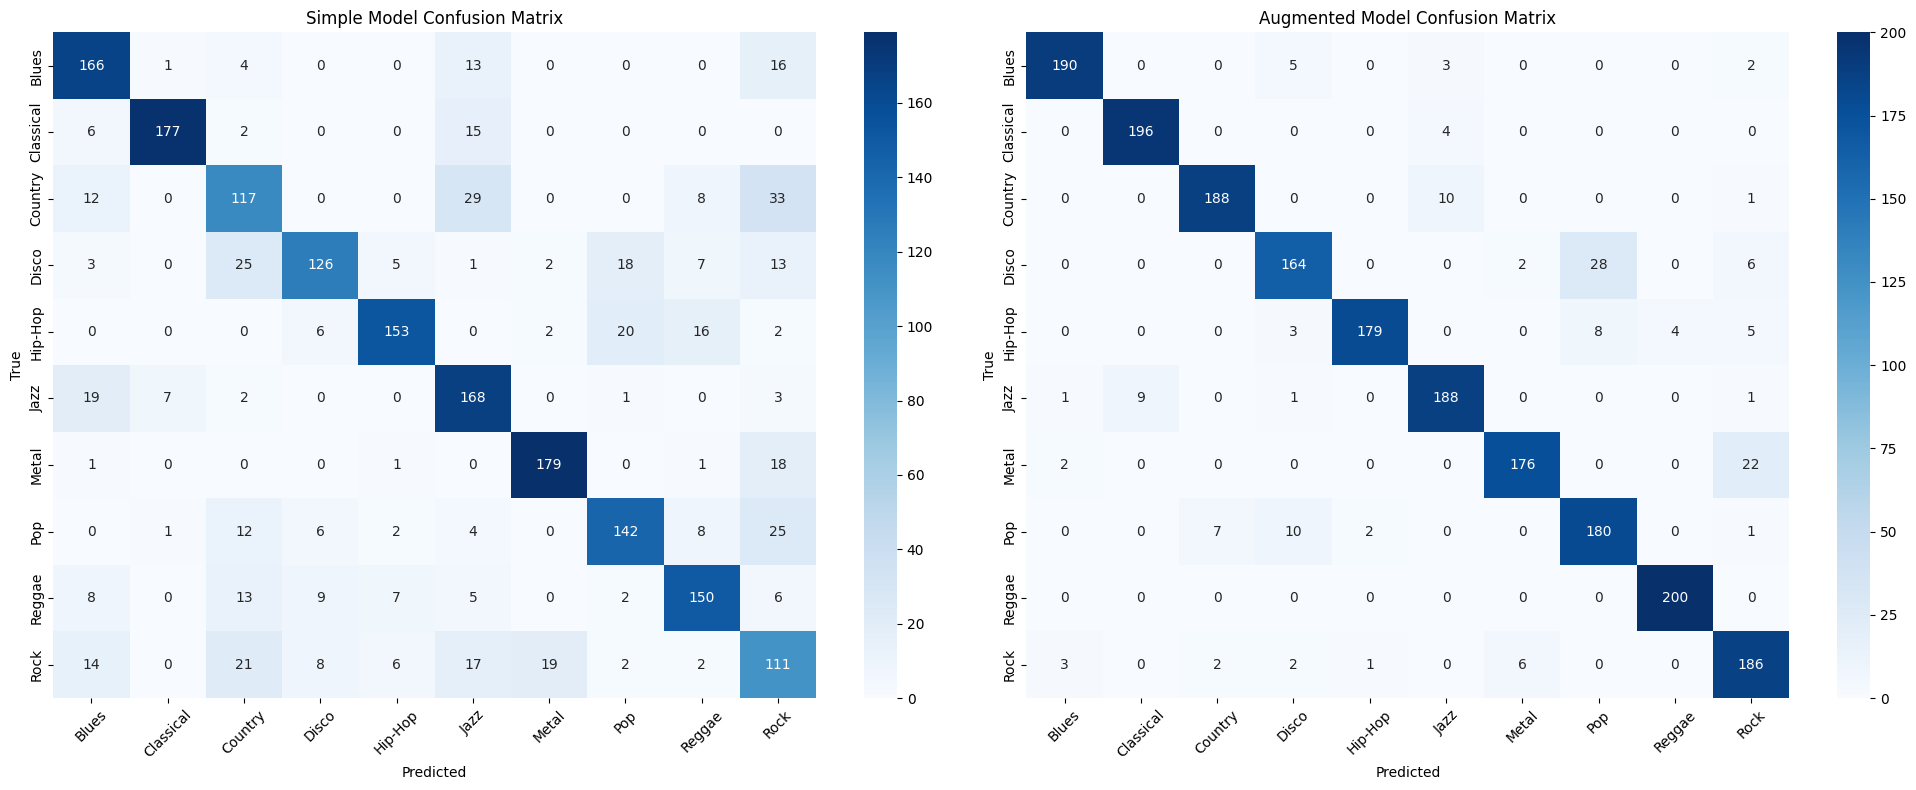

In [102]:
genre_labels = [
    "Blues", "Classical", "Country", "Disco", "Hip-Hop",
    "Jazz", "Metal", "Pop", "Reggae", "Rock"
]

all_images = []
all_labels = []
for images, labels in test_ds:
    all_images.append(images)
    all_labels.append(labels)
all_images = np.concatenate(all_images, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# Simple model predictions
simple_preds = simple_model.predict(all_images)
simple_y_pred = np.argmax(simple_preds, axis=1)

# Augmented model predictions
aug_preds = aug_model.predict(all_images)
aug_y_pred = np.argmax(aug_preds, axis=1)

y_true = all_labels

# Confusion matrixes
cm_simple = confusion_matrix(y_true, simple_y_pred)
cm_aug = confusion_matrix(y_true, aug_y_pred)

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(
    cm_simple, annot=True, fmt='d', cmap='Blues',
    xticklabels=genre_labels, yticklabels=genre_labels, ax=axs[0]
)
axs[0].set_title('Simple Model Confusion Matrix')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('True')
axs[0].tick_params(axis='x', rotation=45)

sns.heatmap(
    cm_aug, annot=True, fmt='d', cmap='Blues',
    xticklabels=genre_labels, yticklabels=genre_labels, ax=axs[1]
)
axs[1].set_title('Augmented Model Confusion Matrix')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('True')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
